# Create a Network from OSM

Create a `networkx` network from OpenStreetMap data.


In [1]:
from shapely import geometry

from cityseer.tools import io

Use a shapely Polygon in WGS84 coordinates to define a boundary for the graph.


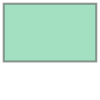

In [2]:
poly_wgs = geometry.box(
    -0.14115725966109327, 51.509220662095714, -0.12676440185383622, 51.51820111033659
)
poly_wgs


Use the [osm_graph_from_poly](https://cityseer.benchmarkurbanism.com/tools/io#osm-graph-from-poly) function available from the `cityseer` package's `io` module.

The function expects a `shapely` polygon and returns a `networkx` graph. `cityseer` will automatically extract the graph topology while also creating accurate street geometries, which are linked to the graph's edges.


In [3]:
G = io.osm_graph_from_poly(poly_wgs)
print(G)


INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 3715/3715 [00:00<00:00, 780106.11it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 4013/4013 [00:00<00:00, 2133300.63it/s]
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
100%|██████████| 4013/4013 [00:00<00:00, 119107.12it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 3715/3715 [00:00<00:00, 29526.49it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 2208/2208 [00:00<00:00, 14355.77it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1404/1404 [00:00<00:00, 241482.93it/s]
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1675/1675 [00:00<00:00, 1598148.13it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 1356/1

MultiGraph with 382 nodes and 591 edges


If using a different CRS, then specify this using the `poly_crs_code` parameter. For example, if you are using UTM zone 30N, then set this to the corresponding EPSG code, in this case [32630](https://epsg.io/32630).


In [4]:
poly_utm = geometry.box(698361, 5710348, 699361, 5711348)
G_utm = io.osm_graph_from_poly(poly_utm, poly_crs_code=32630)
print(G_utm)


INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 3771/3771 [00:00<00:00, 871300.63it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 4068/4068 [00:00<00:00, 2209872.90it/s]
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
100%|██████████| 4068/4068 [00:00<00:00, 117926.48it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 3771/3771 [00:00<00:00, 28156.06it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 2245/2245 [00:00<00:00, 14317.60it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1420/1420 [00:00<00:00, 231873.85it/s]
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1706/1706 [00:00<00:00, 1801027.59it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 1371/1

MultiGraph with 381 nodes and 595 edges


`cityseer` will set node and edge geometry coordinates to the local projected UTM coordinate reference system. If you want to create the resulting graph in a specific CRS, then specify this using the `to_crs_code` parameter. For example, in the UK you might want to use the British National Grid, which has the EPSG code [27700](https://epsg.io/27700).


In [5]:
G_bng = io.osm_graph_from_poly(poly_wgs, to_crs_code=27700)
print(G_bng)

INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 27700.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 3715/3715 [00:00<00:00, 812019.35it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 4013/4013 [00:00<00:00, 2179995.07it/s]
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
100%|██████████| 4013/4013 [00:00<00:00, 128055.49it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 3715/3715 [00:00<00:00, 30782.83it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 2208/2208 [00:00<00:00, 14937.59it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1399/1399 [00:00<00:00, 239200.66it/s]
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1673/1673 [00:00<00:00, 1635299.60it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 1351/1

MultiGraph with 380 nodes and 589 edges


`cityseer` will automatically attempt to clean-up the graph by removing unnecessary nodes and simplifying the graph. If you only want basic cleaning without simplification, then set the `simplify` parameter to `False`. Note that in this case the graph has significantly more nodes and edges because simplification has not been applied.


In [6]:
G_raw = io.osm_graph_from_poly(poly_wgs, simplify=False)
print(G_raw)

INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 3715/3715 [00:00<00:00, 939117.61it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 4013/4013 [00:00<00:00, 2362349.75it/s]
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
100%|██████████| 4013/4013 [00:00<00:00, 132920.65it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 3715/3715 [00:00<00:00, 30791.05it/s]

MultiGraph with 1910 nodes and 2208 edges
